<h1><center>Email network analysis</center></h1>
<h3><center>Email network analysis of employees in Enron</center></h3>

Enron Corporation was an American energy, commodities, and services company. This company ceased operaitions in 2007. The dataset consists of links between 143 employees who sent emails to each other within the system. A total of 623 email links are accounted for by the dataset.<br>

The aim of this project is to analyze the network and report various key metrics for the network such as:-
* Clustering coefficient
* Central and periphery nodes
* Connected components (if any) and type 
* Node and link connectivities
* Network centrality
* Communities in the network

These metrics summarize the network to understand, key nodes in the network and overall spread and behaviour of the network. The dataset can be found at <a href="http://networkrepository.com/email-enron-only.php">Link</a>. 
It contains only two columns, a source - sender of the email - and a target - receiver of the email. 

In [412]:
import pandas as pd
import networkx as nx
import markov_clustering as mc
import numpy as np
import matplotlib.pyplot as plt

default_colors = [
    '#1f77b4',  '#ff7f0e',  '#2ca02c', '#d62728',  '#9467bd',   '#8c564b',  '#e377c2',  
    '#7f7f7f',  '#bcbd22',  '#17becf',  '#e6194b', '#3cb44b',   '#ffe119',  '#4363d8',
    '#f58231',  '#911eb4', '#46f0f0','#f032e6',    '#bcf60c',    '#fabebe',    '#008080',    '#e6beff',
    '#9a6324','#fffac8',    '#800000',    '#aaffc3',    '#808000',    '#ffd8b1',    '#000075',
    '#808080',
]

The dataset is read in with the appropriate column names.

In [2]:
df = pd.read_table('./email-enron-only.mtx', header= None, sep= ' ')
df.columns = ['source','target']
df.head(5)

source  target
0      17       1
1      72       1
2       3       2
3      19       2
4      20       2

Since there is a defined source and target of the email, a directed graph makes sene. Since for the analysis, the connect is important rather than direction of the email, an undirected graph is chosen for this purpose. The network is visualized below to gain insights if any, before analysis.

Text(0.5, 1.0, 'Email Network')

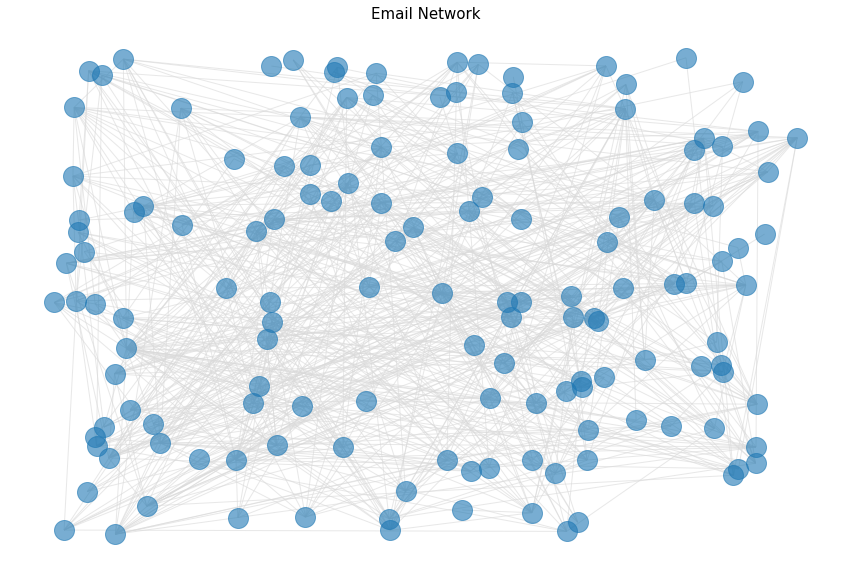

In [5]:
graph = nx.from_pandas_edgelist(df, create_using= nx.Graph)
pos = nx.random_layout(graph)
plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    node_size= 400,
    edge_color= '0.85',
    alpha= 0.6,
    edge_size= 5,
    pos= pos
)
plt.axis('off')
plt.title("Email Network", fontdict= {'size':15})

The network is very dense visually. Nodes share a high degree (in/out) as shown by the visualization. Before proceeding further into the analysis, a few basic metrics of the network have to be known:-
* Max/Min Degree
* Diameter
* Radius
* Average distance

And to check whether the network shows some basic properites of the graph such as:-
* Strongly connected
* Bipartite

In [6]:
print("Max node degree (in + out) is {}".format(max(nx.degree(graph), key= lambda x: x[1])[1]))
print("Max node degree (in + out) is {}".format(min(nx.degree(graph), key= lambda x: x[1])[1]))
print("Diameter of the network is {}".format(nx.diameter(graph)))
print("Radius of the network is {}".format(nx.radius(graph)))
print("Average distance in the network {}\n".format(nx.average_shortest_path_length(graph)))

print("Is bipartite? {}".format(nx.is_bipartite(graph)))
print("Is connected? {}".format(nx.is_connected(graph)))

Max node degree (in + out) is 42
Max node degree (in + out) is 1
Diameter of the network is 8
Radius of the network is 4
Average distance in the network 2.967004826159756

Is bipartite? False
Is connected? True


The undirected graph is connected, which means that there exists a path between every pair of nodes, no node is disconnected or out of reach from other nodes. The average distance or average shortest path length in the network is around 3. This means every node on average can be reached in 3 hops. The diameter is the maximum distance between a pair of nodes and radius is the minimum of eccentricity (maximum of all distances from a node) in the graph.<br>
The graph is not bipartite, meaning there are no two subsets of nodes (employees) that can be segregated such that no node within the subset communicates.<br>

The next segment of the analysis is to identify central and periphery nodes of the network. <br>
Central nodes are those that have an eccentricity equal to the radius, in short, these nodes are central to the network as they have short distance (path length) to all other nodes.
Periphery nodes are those nodes that have eccentricity equal to the diameter of the network. These nodes have longer paths to all other nodes as compared to the ones in the center.

Centers of the network:  [91]


Text(0.5, 1.0, 'Center node in the Network')

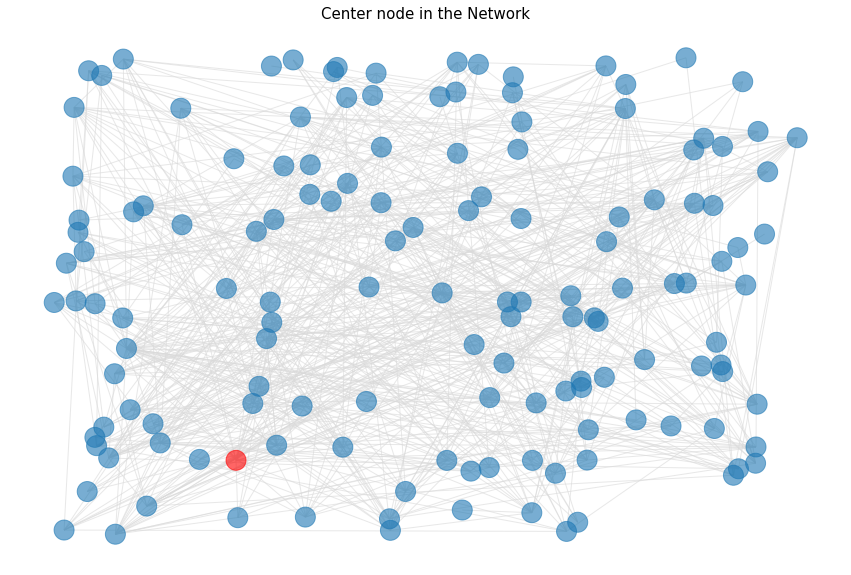

In [413]:
def colors(n,l):
    if n in l:
        return 'red'
    else:
        return '#1f78b4'
    
centers = nx.center(graph)
node_color = [colors(n,centers) for n in graph.nodes()]

print("Centers of the network: ",centers)

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    alpha= 0.6,
    edge_color= '0.85', 
    edge_size= 5,
    node_size = 400,
    node_color= node_color,
    pos= pos
)
plt.axis('off')
plt.title("Center node in the Network", fontdict= {'size':15})

Peripheries of the network:  [15, 42, 86, 84, 127, 113, 133, 92, 98]


Text(0.5, 1.0, 'Periphery nodes in Network')

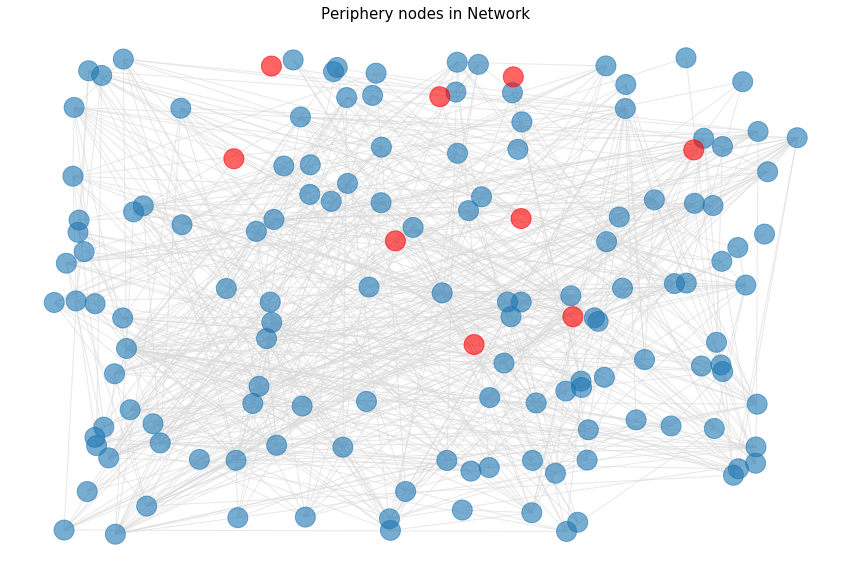

In [414]:
periphery = nx.periphery(graph)
node_color = [colors(n,periphery) for n in graph.nodes()]

print("Peripheries of the network: ",periphery)

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    alpha= 0.6,
    edge_color= '0.85',
    edge_size= 5,
    node_size= 400,
    node_color= node_color,
    pos= pos
)
plt.axis('off')
plt.title("Periphery nodes in Network", fontdict= {'size':15})

The center node of the network and periphery nodes of the network are shown in the plots above in that order.<br>

The network under analysis is a connected network as proved before. A connected graph can be converted to a disconnected graph upon removing certain nodes or edges or both. The capability of a network to function even after removal of an edge or node is called Network robustness.<br>

The node and the edges, which upon removal render the network disconnected are found as,

In [9]:
print("Number of node removals - {}, the node - {}".format(nx.node_connectivity(graph), nx.minimum_node_cut(graph)))
print("Number of edge removals - {}, the edge - {}".format(nx.edge_connectivity(graph), nx.minimum_edge_cut(graph)))

Number of node removals - 1, the node - {85}
Number of edge removals - 1, the edge - {(130, 98)}


In both cases, just removal of 1 node or edge, disconnects the graph. This shows that the network has very low robustness, and it is not resistant to changes, errors or other faults that may occur in the network. Since the network is of employees, it may be the case, that the 143 employees are part of different teams, and one employee in the middle connects the two teams in the company.<br>

The vulnerable node and edge are visualized below, a before and after view of the network after removal of each.<br>

NOTE: Disconnected graph here simply means that removal of that node or edge may make certain nodes unreachale from other nodes, it does not necessarily mean the network will be divided into two subgraphs.

Text(0.5, 1.0, 'Node and Edge connectivity')

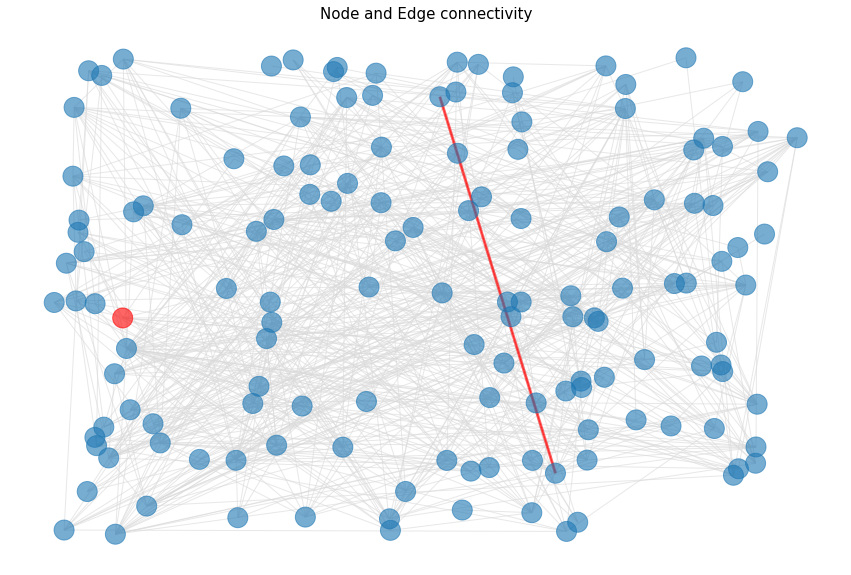

In [10]:
node_conn = nx.minimum_node_cut(graph)
edge_conn = nx.minimum_edge_cut(graph)
node_color = [colors(n,node_conn) for n in graph.nodes()]
edge_color = ['0.85' if e not in edge_conn else 'r' for e in graph.edges()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    alpha= 0.6,
    edge_color= edge_color,
    edge_size= 5,
    node_size= 400,
    node_color= node_color,
    pos= pos
)
nx.draw_networkx_edges(graph, edgelist= edge_conn, pos= pos, edge_color= 'r', width= 3, alpha= 0.6)
plt.axis('off')
plt.title("Node and Edge connectivity", fontdict= {'size':15})

The node and edge in red show the crucial points in the network. Upon removing either, the network becomes disconnected, i.e. there exists atleast one pair of nodes that do not have a path between them.<br>

The next segment is to analyse the network in terms of charateristics that defines how well connected the network is or what nodes are important to the network. 
First is the clustering coefficent. For a node, clustering coefficient is the fraction of pairs of node's friends who are friends with each other. In terms of employees, clustering coefficient gives the fraction pair of collegues of an employee who are communicate with eachother.<br>

The clustering coefficient can be calculated by either:-
* Average clustering coefficient
* Transitivity

Transitivity measures the percentage of open triads in a network, except transitivity weighs nodes with large degrees higher.

In [11]:
print("Average clustering coefficient {}".format(nx.average_clustering(graph)))
print("Transitivity of the network {}".format(nx.transitivity(graph)))

Average clustering coefficient 0.43390702914792223
Transitivity of the network 0.3590951932139491


The average clustering coefficient of the network is quite high. That paired with previous observations of a low average distance can show that the network here mimics a small network model. A histogram of degrees is plotted below .

Text(0.5, 1.0, 'Degree histogram of the Network')

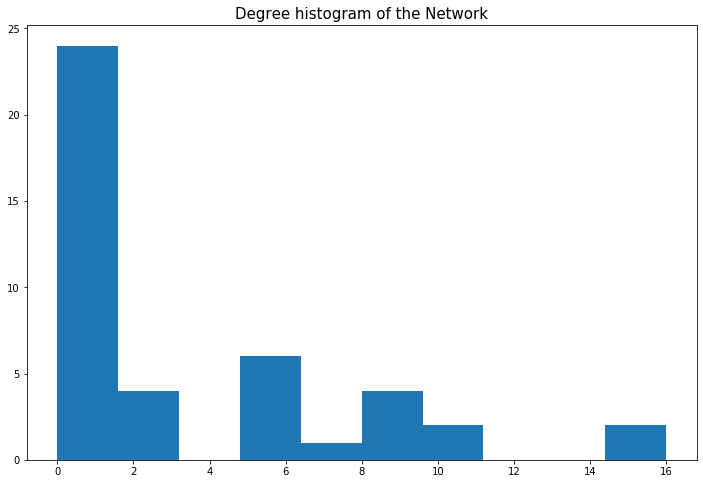

In [12]:
vals = nx.degree_histogram(graph)

plt.figure(figsize= (12,8))
plt.hist(vals)
plt.title("Degree histogram of the Network", fontdict= {'size':15})

The histogram shows that the degree values are highly concentrated in one bin, the rest have smaller frequency. This proves the network mimics a small world network model with the following charateristics:-
* High average clustering coefficient
* Low average shortest path length
* Skewed degree histogram with lesser values.

Now, the centrality measures are calculated and visualized for the network. Network centrality measures the importance of nodes based on various criteria. Based on different definitions of importance of a node, different measures exist:-
* Degree centrality
* Closeness centrality
* Betweeness centrality

Degree centrality assumes that an important node is the one which is connected to many other nodes (number of neighbours - degree). With this assumption, an employee who is in touch with many employees is an important node in realizing the network.

10 most important nodes as per Degree centrality
 [105, 17, 95, 48, 132, 43, 31, 74, 91, 72]




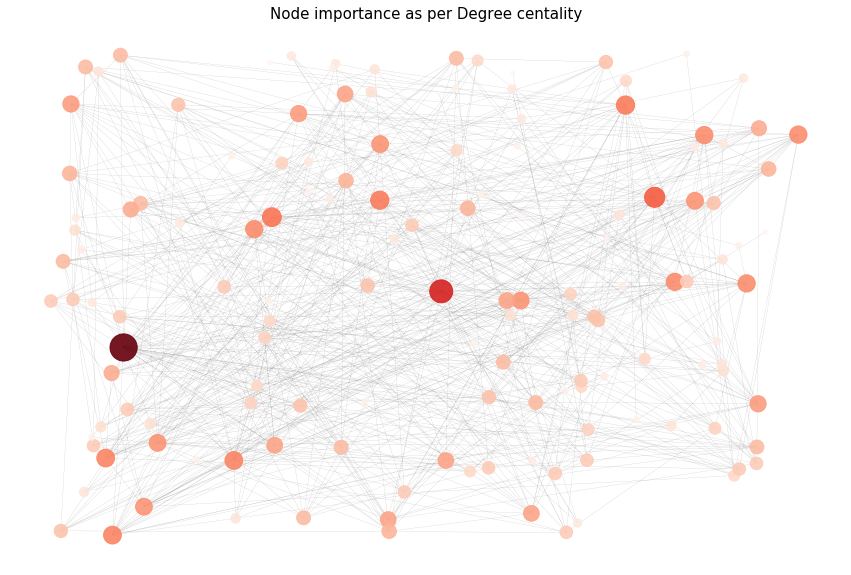

In [41]:
deg_centrality = nx.degree_centrality(graph)
size = [deg_centrality[n]*2500 for n in graph.nodes()]
color = [graph.degree(n) for n in graph.nodes()]

plt.figure(figsize= (15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    edge_color= '0.4',
    width= 0.1,
    node_size= size,
    node_color= color,
    alpha= 0.9,
    pos= pos,
    cmap= plt.cm.Reds
)
plt.axis('off')
plt.title("Node importance as per Degree centality", fontdict= {'size':15})

print("10 most important nodes as per Degree centrality\n {}\n\n".format(
    [n[0] for n in sorted(deg_centrality.items(), key= lambda x: x[1], reverse= True)[:10]]
))

The size of the node represents the degree centrality score. Higher the size, higher the degree centrality. Similarly, the color represents the degree of the node, darker the red, higher the degree.
The nodes - 105, 17, 95, 48, 132, 43, 31, 74, 91, 72 are the most important 10 nodes in the network.<br>

The next measure is the closeness centrality. It assumes that all important nodes are those that are closer to all other nodes, i.e. nodes that have shortest paths to many other nodes in the network. With this assumption, an employee is said to be important in the network, if he/she has good reachability to all collegues of the network.

10 most important nodes as per Closeness centrality
 [105, 17, 95, 74, 37, 48, 91, 43, 72, 22]




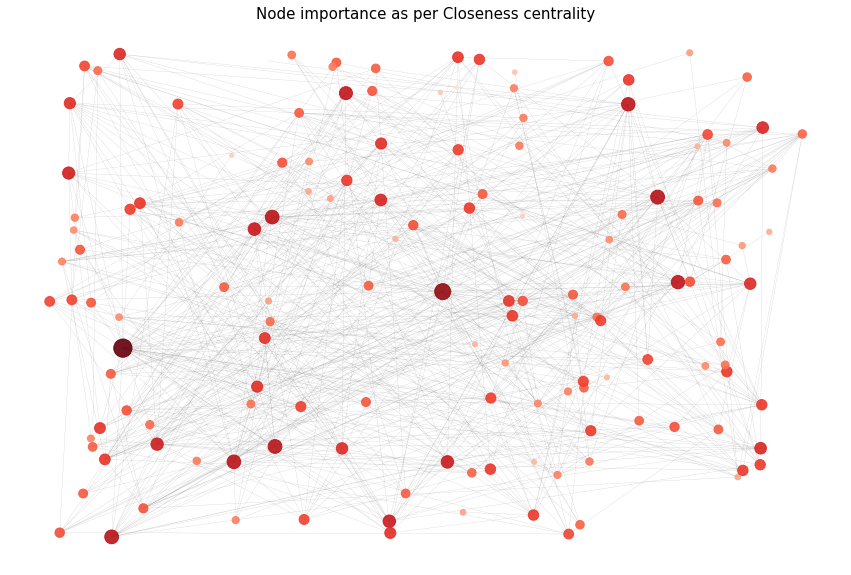

In [79]:
closeness_centrality = nx.closeness_centrality(graph)
size = [-1000 * np.log((1 - closeness_centrality[n]))**3 for n in graph.nodes()]
color = [closeness_centrality[n] for n in graph.nodes()]

plt.figure(figsize= (15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    edge_color= '0.4',
    width= 0.1,
    node_size= size,
    node_color= color,
    alpha= 0.9,
    pos= pos,
    cmap= plt.cm.Reds
)
plt.axis('off')
plt.title("Node importance as per Closeness centrality", fontdict= {'size':15})

print("10 most important nodes as per Closeness centrality\n {}\n\n".format(
    [n[0] for n in sorted(closeness_centrality.items(), key= lambda x: x[1], reverse= True)[:10]]
))

The size and color of the nodes indicates the closeness centrality of the node. Thus darker and bigger nodes are those with high closeness centrality. The nodes - 105, 17, 95, 74, 37, 48, 91, 43, 72, 22 are the most important 10 nodes in terms of closeness centrality, meaning, they have shortest paths to many of the nodes in the network. It is important to note, that most nodes have very close centrality values, mostly all nodes are closer to other nodes.<br>

The next measure is the betweenness centrality. It assumes that a node is important if it connects other nodes, i.e. an important node would be in the shortest path for many node connections in the network. With this assumption, an employee is important in the network, if all information passed goes through him/her. Intuitively, this employee connecting departments of the company.

10 most important nodes as per Betweenness centrality
 [105, 17, 48, 91, 32, 95, 141, 22, 72, 51]




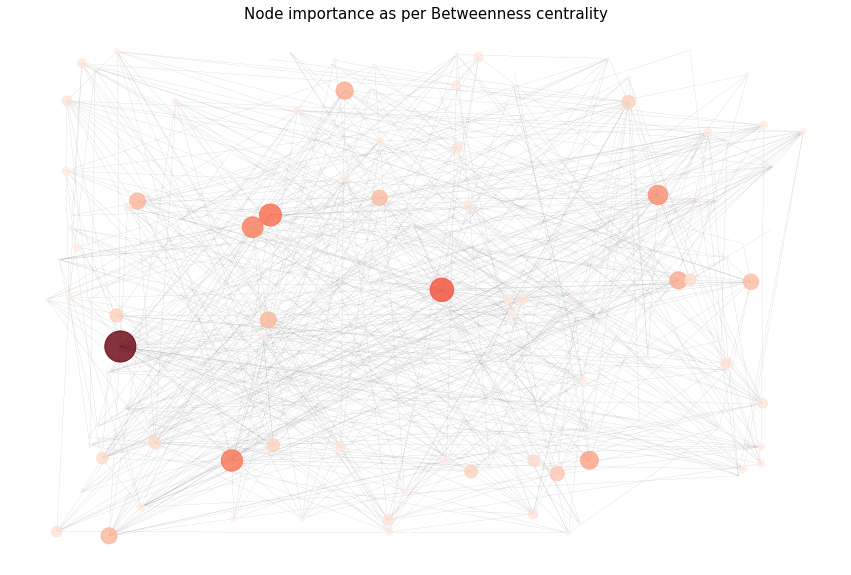

In [55]:
betweenness_centrality = nx.betweenness_centrality(graph)
size = [betweenness_centrality[n]*5000 for n in graph.nodes()]
color = [betweenness_centrality[n] for n in graph.nodes()]

plt.figure(figsize= (15,10))
nx.draw_networkx(
    graph,
    with_labels= False,
    edge_color= '0.4',
    width= 0.1,
    node_size= size,
    node_color= color,
    alpha= 0.8,
    pos= pos,
    cmap= plt.cm.Reds
)
plt.axis('off')
plt.title("Node importance as per Betweenness centrality", fontdict= {'size':15})

print("10 most important nodes as per Betweenness centrality\n {}\n\n".format(
    [n[0] for n in sorted(betweenness_centrality.items(), key= lambda x: x[1], reverse= True)[:10]]
))

The size and color of the node indicates the betweenness centrality. Thus darker and bigger nodes indicate higher betweenness centrality. The nodes - 105, 17, 48, 91, 32, 95, 141, 22, 72, 51 are the most important 10 nodes according to this metric.

Two more kinds of measures exists namely - PageRank and Hubs & Authority. These are mainly for directed graphs and are usually used to describe the Web page - hyperlink architecture of the Internet. For the purpose of the analysis, the graph is converted to a directed graph to find noe importance on these measures. It could give some meaningful insight into the relationship between the employees.

10 most important nodes as per Page Rank
 [17, 6, 7, 2, 10, 11, 3, 14, 9, 43]




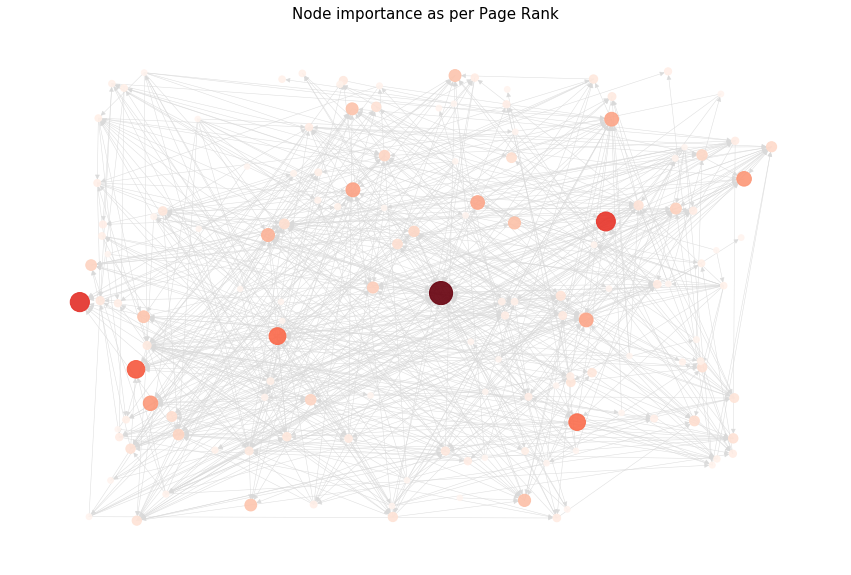

In [95]:
digraph = nx.from_pandas_edgelist(df, create_using= nx.DiGraph)
page_ranks = nx.pagerank(digraph)
size = [page_ranks[n]*11000 for n in digraph.nodes()]
color = [page_ranks[n] for n in digraph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    digraph,
    alpha= 0.9,
    with_labels= False,
    node_size= size,
    node_color= color,
    edge_color= '0.85',
    width= 0.5,
    pos= pos,
    cmap= plt.cm.Reds
)
plt.axis('off')
plt.title("Node importance as per Page Rank", fontdict= {'size':15})

print("10 most important nodes as per Page Rank\n {}\n\n".format(
    [n[0] for n in sorted(page_ranks.items(), key= lambda x: x[1], reverse= True)[:10]]
))

The size and the color of the node indicate the page rank of the node in the network. Darker and bigger the node, higher the page rank. Page rank basically assumes that an important node is the one which has many in-links. With this assumption, an employee having many in-links in the company, is an important employee. This is intuitive as any employee at an important designation usually receive a lot more emails from various other employees working under him/her. The nodes - 17, 6, 7, 2, 10, 11, 3, 14, 9, 43 are the most important 10 nodes as per Page Rank in the network.

The Hubs and Authority scores are a set of scores for each node indicating importance of the node. A high hub score means the node that points to many good authority nodes, similarly, a high authority score means the node is pointed by many good hubs. With respect to the employees, an employee is a hub, when the employee communicates with several authority employees, and an employee is an authority, if he/she receives many emails from employees that are hubs.

10 most important nodes as per Hub scores
 [132, 105, 136, 69, 67, 31, 71, 65, 48, 27]

10 most important nodes as per Authority scores
 [2, 19, 20, 3, 4, 18, 31, 17, 28, 48]




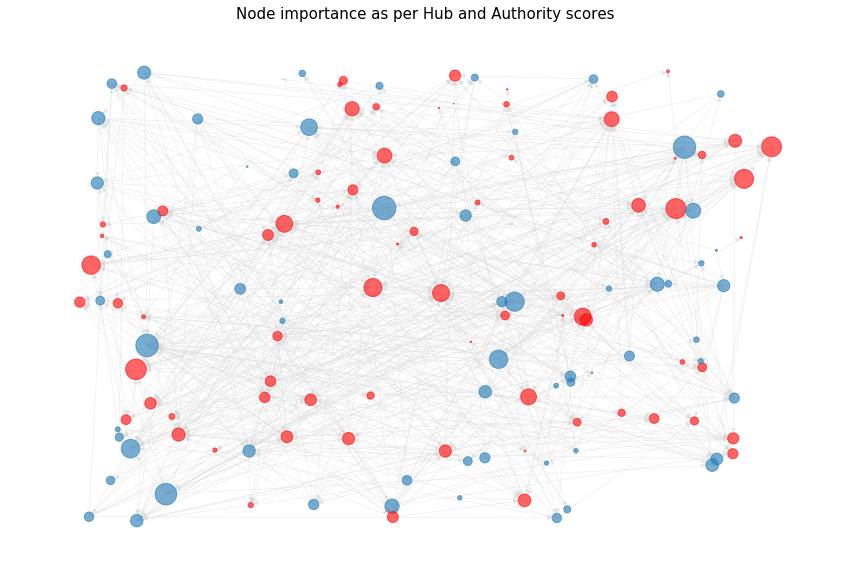

In [121]:
hubs_and_authority = nx.hits(digraph)
hubs = hubs_and_authority[0]
auth = hubs_and_authority[1]
size = [hubs[n] * 11000 if hubs[n] >= auth[n] else auth[n] * 11000 for n in digraph.nodes()]
color = ['#1f78b4' if hubs[n] > auth[n] else 'r' if hubs[n] < auth[n] else 'grey' for n in digraph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    digraph,
    alpha= 0.6,
    with_labels= False,
    node_size= size,
    node_color= color,
    edge_color= '0.85',
    width= 0.5,
    pos= pos,
    cmap= plt.cm.Reds
)
plt.axis('off')
plt.title("Node importance as per Hub and Authority scores", fontdict= {'size':15})

print("10 most important nodes as per Hub scores\n {}\n".format(
    [n[0] for n in sorted(hubs.items(), key= lambda x: x[1], reverse= True)[:10]]
))
print("10 most important nodes as per Authority scores\n {}\n\n".format(
    [n[0] for n in sorted(auth.items(), key= lambda x: x[1], reverse= True)[:10]]
))

The red nodes are Authorities and the blue nodes are hubs. Size of the node indicates the score. Larger the node, higher the respective score is. This shows how nodes are clearly divided into two roles in the network, the first being hubs are employees that send out emails to many authority nodes and the other being authority are employees that receive many emails from hub nodes.<br>
The Hub nodes - 132, 105, 136, 69, 67, 31, 71, 65, 48, 27 are the most important 10 hubs in the network, similarly the authority nodes - 2, 19, 20, 3, 4, 18, 31, 17, 28, 48 are the most important 10 authorities in the network
<br>


Based on all metrics, the most important 10 nodes per criteria have been selected. A few nodes maybe common between them, These common nodes are said to be the most important and involved nodes in the network. Usually any one of the metrics is chosen as per the need, here the intersection is taken only to analyse which nodes are generally important by every metric.

In [136]:
deg_10 = set([x[0] for x in sorted(deg_centrality.items(), key= lambda x: x[1], reverse= True)[:10]])
close_10 = set([x[0] for x in sorted(closeness_centrality.items(), key= lambda x: x[1], reverse= True)[:10]])
bet_10 = set([x[0] for x in sorted(betweenness_centrality.items(), key= lambda x: x[1], reverse= True)[:10]])

print("Nodes as per Degree centrality\n",deg_10)
print("Nodes as per Degree centrality\n",close_10)
print("Nodes as per Degree centrality\n",bet_10)

print('\nCommon nodes between all centrality measures\n',bet_10.intersection(deg_10.intersection(close_10)))

Nodes as per Degree centrality
 {132, 72, 105, 74, 43, 48, 17, 91, 31, 95}
Nodes as per Degree centrality
 {37, 72, 105, 74, 43, 48, 17, 22, 91, 95}
Nodes as per Degree centrality
 {32, 72, 105, 141, 48, 17, 51, 22, 91, 95}

Common nodes between all centrality measures
 {72, 105, 48, 17, 91, 95}


The nodes - 72, 105, 48, 17, 91, 95 are the most important nodes in the network based on all metrics of centrality. These nodes have high degree, shortest paths to many nodes and a node in the path of many shortest paths in the network. <br>

As social networks get larger and complex, it becomes difficult to analyze them. Thus the graph is broken down into communities and analyzed on granular level. A community is defined as a subset of nodes that are densely connected to eachother and loosely connected to other subsets/communities in a graph.<br>
Community detection is a clustering task. Densely connected subgraphs are clustered into communities. Mainly, there are two types of algorithms used - Aglomerative and Divisive.

Girvan-Newman algorithm is a kind of divisive clustering algorithm, where at each step an edge with highest edge betweenness centrality is removed. After a few steps, densely connected communities are obtained. Every community detection algorithm tries to optimize the modularity of the communities, So modularity will be the score to compare for selecting effective number of communities.<br>

The Girvan-Newman algorithm is implemented from scratch as below,

Text(0.5, 1.0, 'Communities within the network')

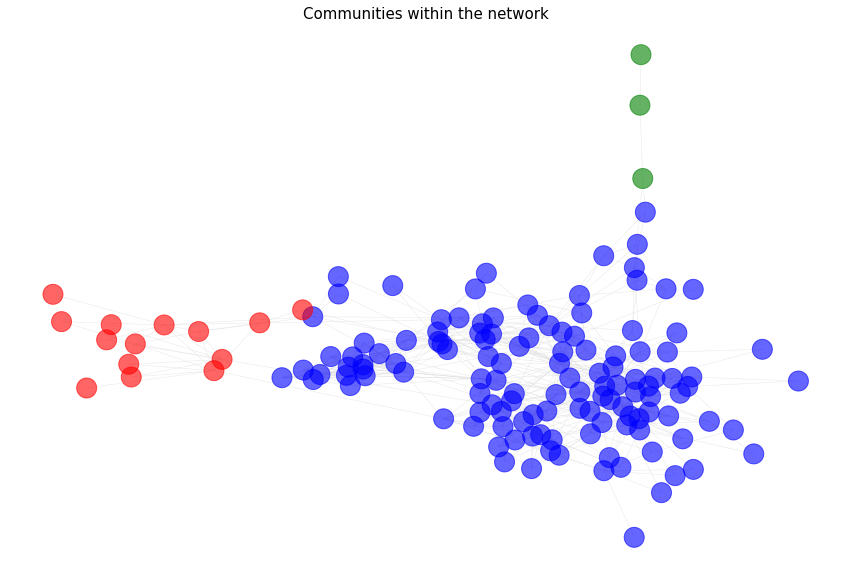

In [322]:
def edge_to_remove(graph):
    """
    Returns the edge with the highest edge betweenness centrality, to be removed
    
    parameters:
        graph: nx.Graph object
    
    return:
        edge: Tuple of edge
    """
    
    edge_btw_centrality = nx.edge_betweenness_centrality(graph)
    edge = max(edge_btw_centrality.items(), key= lambda item: item[1])[0]
        
    return edge

def girvan_newman(graph,k):
    """
    Apply girvan-newman algorithm to detect communities in the network
    
    parameters:
        graph: nx.Graph object
        k: int, number of clusters
        
    returns:
        conn_comps: A generator of connected components
    """
    
    conn_comps = nx.connected_components(graph)
    num_conn_comps = nx.number_connected_components(graph)
    
    while(num_conn_comps < k):
        edge = edge_to_remove(graph)
        graph.remove_edge(edge[0],edge[1])
        conn_comps = nx.connected_components(graph)
        num_conn_comps = nx.number_connected_components(graph)
        
    return conn_comps

def color_grps(n):
    """
    Color the nodes based on cluster
    
    parameters:
        n: node
    
    returns:
        str: color string
    """
    
    if n in node_grps[0]:
        return 'b'
    elif n in node_grps[1]:
        return 'r'
    else:
        return 'g'

g = girvan_newman(graph.copy(),3)
node_grps = []

for i in list(g):
    node_grps.append(i)
    
color = [color_grps(n) for n in graph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    alpha= 0.6,
    node_size= 400,
    node_color= color,
    edge_color= '0.85',
    width = 0.5,
    with_labels= False
)
plt.axis('off')
plt.title('Communities within the network', fontdict= {'size':15})

The code considers 3 clusters and is accordingly visualized as above. Three distict communities have been found. The community in blue is the largest of them all. In the implementation, the code stops at a value equal to k (number of communities) here 3, but in reality, it is a divisive algorithm and hence, community should begin at 2 and end when each node is a community. Then out of all, the most optimum community split is chosen via modularity and performance scores.<br>

For this the inbuilt girvan-newman algorithm is used. It returns a list of community sets for each iteration of hierarchial clustering.

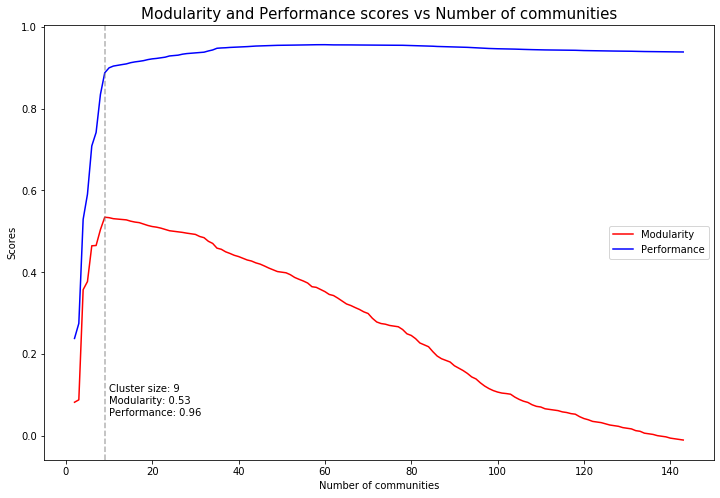

In [364]:
g = nx.community.girvan_newman(graph.copy())
comm_grp = []

for i in list(g):
    comm_grp.append(i)
    
mod_scores = [nx.community.modularity(graph,grp) for grp in comm_grp]
perf = [nx.community.performance(graph, grp) for grp in comm_grp]
clusters = [x for x in range(2,len(comm_grp[-1])+1)]

plt.figure(figsize=(12,8))
plt.plot(clusters, mod_scores, label= 'Modularity', color= 'r')
plt.plot(clusters, perf, label= 'Performance', color = 'b')
plt.axvline(x= clusters[np.argmax(mod_scores)], color= 'grey', linestyle= '--', alpha= 0.6)
plt.annotate(
    xy=(clusters[np.argmax(mod_scores)]+1,0.05),
    s='Cluster size: {}\nModularity: {}\nPerformance: {}'.format(
        clusters[np.argmax(scores)],
        round(max(mod_scores),2),
        round(max(perf),2)
))
plt.title("Modularity and Performance scores vs Number of communities", fontdict= {'size':15})
plt.xlabel('Number of communities')
plt.ylabel('Scores')
plt.legend()

Running the Girvan-Newman algorithm returned a list of communities from each iteration. The Modularity and Performance scores are calculated for each iteration partitions and plotted against the number of communities. The plot shows that number of communities = 9 is the optimal size with Modularity score at peak and Performance score flattening after this point.

Text(0.5, 1.0, 'Communities within the network')

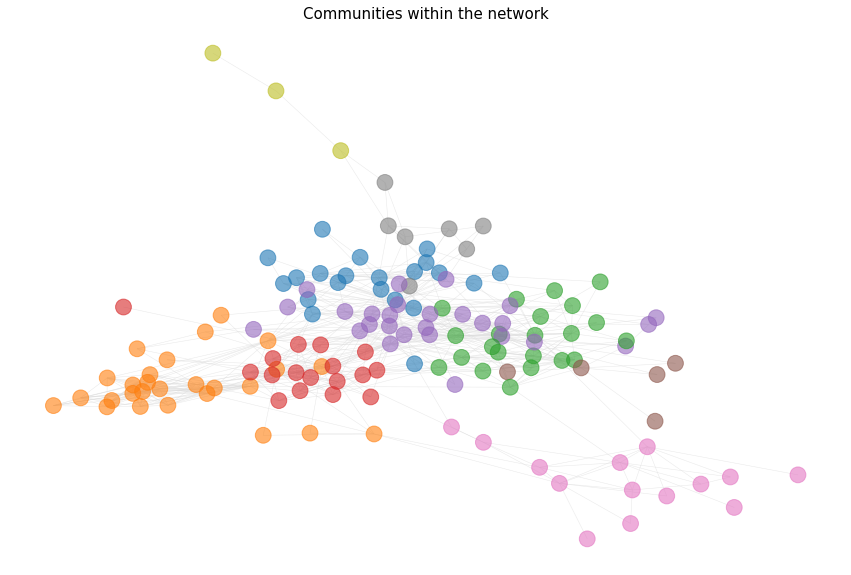

In [402]:
def color_communities(comm,n):
    """
    Color each node to represent the community
    
    parameters:
        comm: List of communities
        n: node
    
    returns:
        str: color in hex string
    """
    
    for ind,c in enumerate(comm):
        if n in c:
            return default_colors[ind]
        
color = [color_communities(comm_grp[7], n) for n in graph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    alpha= 0.6,
    node_size= 250,
    node_color= color,
    edge_color= '0.85',
    width = 0.5,
    with_labels= False
)
plt.axis('off')
plt.title('Communities within the network', fontdict= {'size':15})

The 9 communities retrieved by the Girvan-Newman algorithm are visualized above. These communities show a modularity of 0.53 and a performance score of 0.96. For comparision purposes and to see how well this clustering is, a few other methods are tested.<br>

The Markov clustering (MCL) is used as the next algorithm to test. The MCL creates a probability matrix using Adjacency matrix. The probability matrix gives the probability of selecting the next node based on the current node (Markov chain - sytem where next state dependent on previous state). A random walk is then simulated using the probability matrix. For each iteration, expansion operation and inflation operation are altered until convergence.<br>
Expansion - Make father paths reachable by taking nth (expansion factor) power of the matrix<br>
Inflation - Strong Neighbour values are strenghtened and weak weakened by taking nth (inflation factor) power of column value and renormalizing it.<br>
The alternating expansion and inflation find communities that are densely connected.

Modularity of communities 0.1304643559229021
Number of communities 57


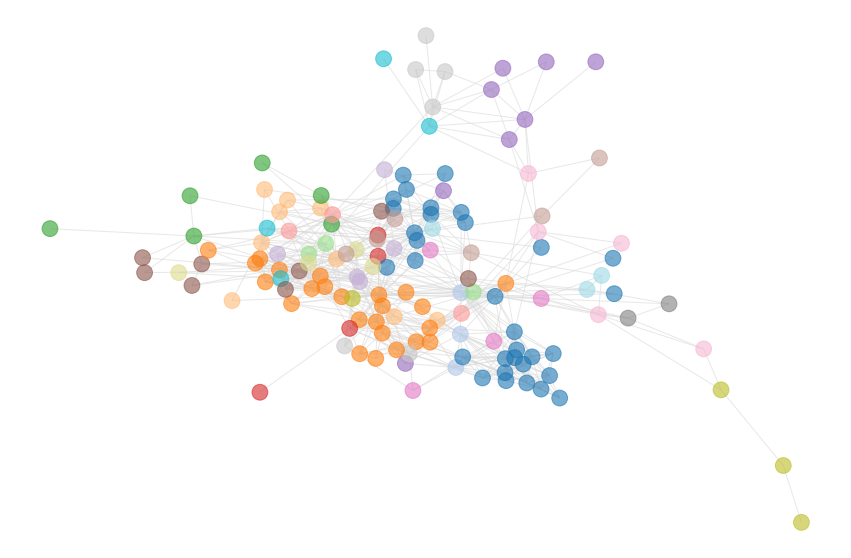

In [375]:
Adj_matrix = nx.to_numpy_matrix(graph)
res = mc.run_mcl(Adj_matrix, expansion=2, inflation= 4, iterations= 300)
clusters = mc.get_clusters(res)

print("Modularity of communities",mc.modularity(Adj_matrix, clusters))
print("Number of communities", len(clusters))

plt.figure(figsize=(15,10))
mc.draw_graph(
    Adj_matrix,
    clusters= clusters,
    node_size= 250,
    with_labels= False,
    edge_color= '0.85',
    alpha= 0.6,
    label= "Markov Clustering communities" 
)

There are 57 communities obtained by Markov Clustering. Many of these would be singletons (single node communities). The modularity score achieved is just 0.13, which is very less as compared to Girvan-Newman. Hence Markov Clustering is clearly not the choice.<br>

The next algorithm tested is the Label propagation algorithm. It is a semi-supervised algorithm. Here all nodes are initially assigned unique labels. Then at each step the labels change based on the neighbouring labels for a node, the maximum number of labels within degree of node. The algorithm quickly converges on common labels for densely connected groups, and continues to expand until it is not possible to do so. It is similar to an aglomerative approach, but requires no other information for nodes to merge.

Modularity of communities 0.4859840413882986
Performance of communities 0.8880133950556486
Number of communities 14


Text(0.5, 1.0, 'Communities within the network')

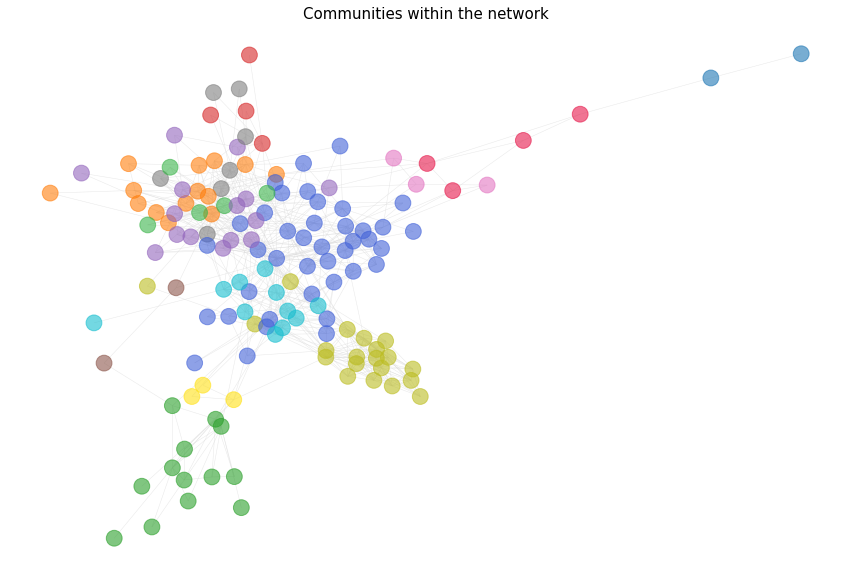

In [410]:
g = nx.community.label_propagation_communities(graph.copy())
lpa_comm = []

for i in g:
    lpa_comm.append(i)

print("Modularity of communities",nx.community.modularity(graph,lpa_comm))
print("Performance of communities",nx.community.performance(graph,lpa_comm))
print("Number of communities", len(lpa_comm))

color = [color_communities(lpa_comm,n) for n in graph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    alpha= 0.6,
    node_size= 250,
    node_color= color,
    edge_color= '0.85',
    width = 0.5,
    with_labels= False
)
plt.axis('off')
plt.title('Communities within the network', fontdict= {'size':15})

Label propagation gave 14 communities with a Modularity of 0.48 and Performance of 0.88, these scores are very close of Girvan-Newman, but yet underperform comparatively.<br>

The last algorithm to be tested against the Girvan-Newman algorithm is the Clauset-Newman-Moore (CNM) greedy modularity maximization algorithm. Here it begins with each node as a community, pairs of communities are merged if modularity increases. The iteration continues until no further merges increase modularity, thus attaining maximum modularity via this algorithm.

Modularity of communities 0.512537068861124
Performance of communities 0.810597852851374
Number of communities 5


Text(0.5, 1.0, 'Communities within the network')

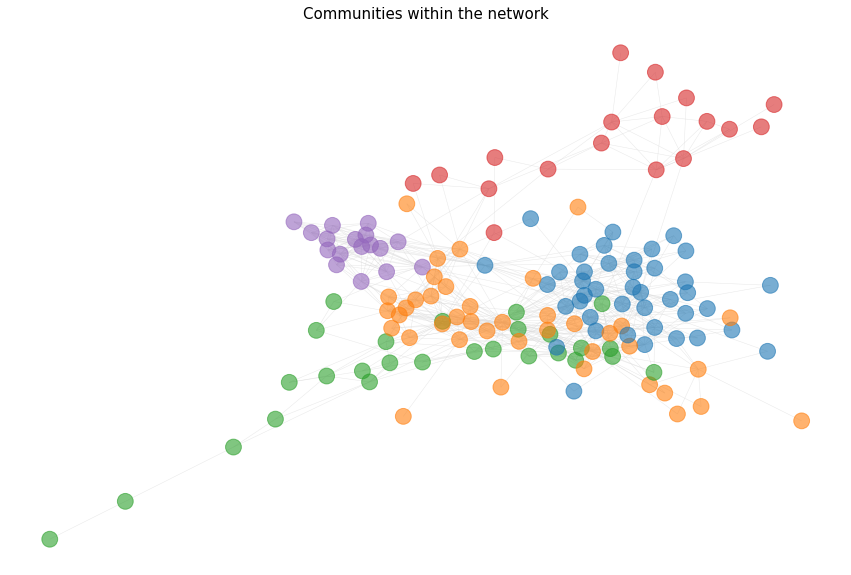

In [411]:
c = nx.community.greedy_modularity_communities(graph.copy())
cnm_comm = []

for i in list(c):
    cnm_comm.append(list(i))

print("Modularity of communities",nx.community.modularity(graph,cnm_comm))
print("Performance of communities",nx.community.performance(graph,cnm_comm))
print("Number of communities", len(cnm_comm))    

color = [color_communities(cnm_comm,n) for n in graph.nodes()]

plt.figure(figsize=(15,10))
nx.draw_networkx(
    graph,
    alpha= 0.6,
    node_size= 250,
    node_color= color,
    edge_color= '0.85',
    width = 0.5,
    with_labels= False
)
plt.axis('off')
plt.title('Communities within the network', fontdict= {'size':15})

The greedy modularity maximization algorithm gives 5 communities with a good modularity of 0.51 and performance of 0.81, which is the closest to the initial Girvan-Newman algorithm. Almost close modularity, but the performance is significantly lower.<br>

Thus the final model chosen in the Girvan-Newman algorithm for community detection. 9 communities are obtained from this.

Final conclusions from the analysis:-
* There are 143 nodes (employees) in the network, with a total of 623 email communications between them.
* The Max degree is 42 and min degree is 1 in the network.
* The network is a connected and not a bipartite graph
* The network has a diameter of 8 and a radius of 4, Average shortest path length in the network is about 3 (2.96)
* The node 91, is the center of the network where as the nodes - 15, 42, 86, 84, 127, 113, 133, 92, 98 are the peripheries.
* The node 85 and the edge 130<->98 is crucial in terms of connectivity.
* High average clustering coefficient of 0.43, low average shortest path length and a skewed one degree dominant degree distribution shows that the network follows a small world model.
* Three centrality measures-

    * Degree centrality
    * Closeness centrality
    * Betweennees centrality
    
  give different ranking for each node. The common nodes in the top 10 of each are 72, 105, 48, 17, 91, 95.
  These are the most important nodes in the network as per centrality measures.
* PageRank and Hubs & Authority scores gave a different set of nodes as important nodes, with only 17 in common with the centrality measures.
* Community detection done using Girvan-Newman algoirthm to achieve 9 communities with a modularity of 0.53 and performance of 0.96